In [2]:
import pydicom
import matplotlib.pyplot as plt

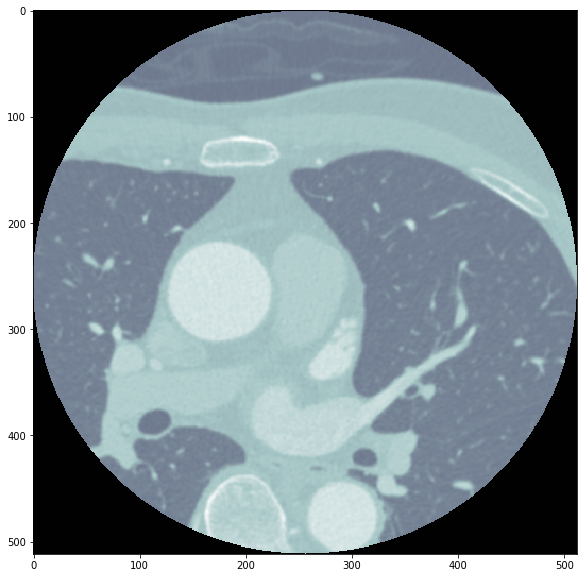

In [7]:
ds = pydicom.dcmread("../Dataset/00030826_Label_S/contrast/IM114.dcm")  
plt.figure(figsize=(10,10,))
plt.imshow(ds.pixel_array,cmap=plt.cm.bone)
plt.show()